In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv(
    "../data/Library_Usage.csv",
    na_values="none")

In [3]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True


# Wie viele junge Erwachsene und Senioren möchten auf welchem Weg benachrichtigt werden?

In [4]:
df['Patron Type Definition'].value_counts()

Adult                  271588
Juvenile                58767
Senior                  47366
Teen                    40340
Welcome                 10587
Digital Access Card      3707
Teacher Card             3161
Staff                     808
Retired Staff             209
At User Adult             128
Library By Mail           117
Visitor                   111
Bibliocommons             109
At User Senior             76
At User Welcome            14
At User Teen               10
At User Juvenile            9
Business                    8
Name: Patron Type Definition, dtype: int64

In [5]:
Mail = df.loc[
    (df['Patron Type Definition'] == 'Juvenile') |
    (df['Patron Type Definition'] == 'Senior')
]

NameError: name 'barplot' is not defined

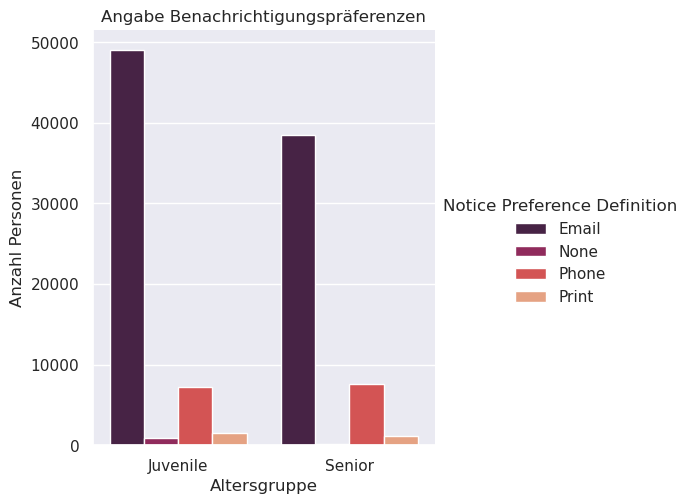

In [6]:
sns.catplot(x = 'Patron Type Definition', kind = 'count', hue = 'Notice Preference Definition', data = Mail, aspect = 1, palette=sns.color_palette('rocket', 4))
plt.title('Angabe Benachrichtigungspräferenzen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl Personen')
plt.show(barplot)

In [7]:
pd.crosstab(
    Mail['Notice Preference Definition'],
    Mail['Patron Type Definition'])

Patron Type Definition,Juvenile,Senior
Notice Preference Definition,,
Email,49063,38529
None,885,105
Phone,7280,7577
Print,1539,1155


### Wie viel Prozent der o.g. Altersgruppen möchten wie benachrichtigt werden?

In [8]:
pd.crosstab(
    Mail['Notice Preference Definition'],
    Mail['Patron Type Definition'],
    margins=True, normalize=1
)

Patron Type Definition,Juvenile,Senior,All
Notice Preference Definition,,,
Email,0.834873,0.813432,0.825304
None,0.015059,0.002217,0.009328
Phone,0.123879,0.159967,0.139985
Print,0.026188,0.024385,0.025383


### Von den jungen Erwachsenen möchten 
83,5% per Mail, 1,5% gar nicht, 12,4% per Telefon, 2,6% per Post benachrichtigt werden.

### Von den Senioren möchten
81,3 % per Mail, 0,2% gar nicht, 16% per Telefon, 2,3% per Post benachrichtigt werden.

Beide Altersgruppen haben ähnliche Präferenzen.

# Mittelwert der Ausleihen von Teenagern, jungen Erwachsenen, Erwachsenen und Senioren

In [9]:
print(df['Patron Type Definition'].unique())

['Juvenile' 'Teen' 'Adult' 'Senior' 'Welcome' 'Digital Access Card'
 'Bibliocommons' 'Teacher Card' 'Library By Mail' 'Staff' 'At User Senior'
 'At User Adult' 'Visitor' 'Retired Staff' 'At User Welcome'
 'At User Juvenile' 'Business' 'At User Teen']


In [10]:
categories = ['Teen', 'Juvenile', 'Adult', 'Senior']
cleaned = df[df['Patron Type Definition'].isin(categories)]
print(cleaned['Patron Type Definition'].unique())

['Juvenile' 'Teen' 'Adult' 'Senior']


In [11]:
categories = ['Teen', 'Juvenile', 'Adult', 'Senior']
for i, category in enumerate(categories):
    group = df.groupby('Patron Type Definition').get_group(category)
    print('Category: ' + category)
    print('Min: %s' % group['Total Checkouts'].min())
    print('Max: %s' % group['Total Checkouts'].max())
    print('Mean: %s' % group['Total Checkouts'].mean())

Category: Teen
Min: 0
Max: 8366
Mean: 235.11224590976698
Category: Juvenile
Min: 0
Max: 6805
Mean: 106.27399731141627
Category: Adult
Min: 0
Max: 45380
Mean: 125.74494454836001
Category: Senior
Min: 0
Max: 22474
Mean: 392.55107038804204


In [12]:
mittelwerte = cleaned.groupby('Patron Type Definition')['Total Checkouts'].agg(Mittelwerte=('mean'))
print(mittelwerte)

                        Mittelwerte
Patron Type Definition             
Adult                    125.744945
Juvenile                 106.273997
Senior                   392.551070
Teen                     235.112246


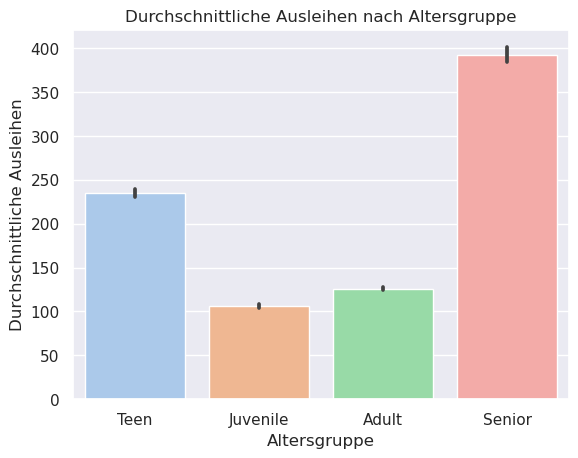

In [13]:
barplot = sns.barplot(data=cleaned, x='Patron Type Definition', y='Total Checkouts', order=categories, palette=sns.color_palette('pastel', 4))
plt.xlabel('Altersgruppe')
plt.ylabel('Durchschnittliche Ausleihen')
plt.title('Durchschnittliche Ausleihen nach Altersgruppe')
plt.show(barplot)

### 
Die Mittelwerte sind in diesem Bsp. nicht sonderlich aussagekräftig, da es extrem große Standardfehler gibt. (s. Senior max.: 22474, Adult max.: 45380, Juvenile max.: 6805, Teen max.: 8366)

### Wie erkenne ich die Streuung?

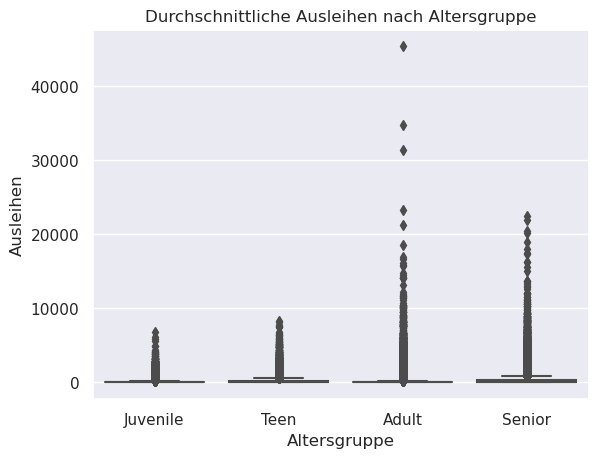

In [14]:
sns.boxplot(data=cleaned, x= 'Patron Type Definition', y='Total Checkouts')
plt.xlabel('Altersgruppe')
plt.ylabel('Ausleihen')
plt.title('Durchschnittliche Ausleihen nach Altersgruppe')
plt.show()

### 
Die horizontalen Linien knapp oberhalb der Linie 0 zeigen den oben berechneten Mittelwert. Hierbei ist gut zu erkennen, dass relativ viele Nutzer:innen pro Altersgruppe vom Mittelwert abweichen, wodurch der Mittelwert nicht aussagekräftig wird. 